# Data Mining Lab 1 - Second HW

This file is the second assignment, which followed the same process from the DM2024-Lab1-Master on the new dataset (Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data).

In [160]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*** step2. Data Preparation ***

\ Data Preparation section \

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split

# read the csv file
def read_file(data_dir):
    data = pd.read_csv(data_dir)
    return data

# Specify the data directory and read the file
data_dir = '/Users/aping/PycharmProjects/DM2024-Lab1/Lab1 Handout/DM2024-Lab1-Homework/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv'
data = read_file(data_dir)

\ Filter Data by Sentiment \ 

In [162]:
# 讀取我的資料跟欄位，設定datapath & radomstate
def fetch_custom_data(data, categories):
    filtered_data = data[data['sentiment'].isin(categories)]
    train_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=42)
    return train_data, test_data

categories = ['not nostalgia', 'nostalgia']
train_data, test_data = fetch_custom_data(data, categories)

In [163]:
# just for test
print(train_data.head(), '\n', test_data.head())

          sentiment  \
382       nostalgia   
538   not nostalgia   
1493  not nostalgia   
1112      nostalgia   
324   not nostalgia   

                                                                                                                                                                                                                  comment  
382                                                                                                                          Tranent British Legion, 1970's. Loved the club and people. This song reminds me o happy days  
538                                                                                                                              The most underrated singer ever,a beautiful song ,r I p billy, what a fabulous voice !!!  
1493  He really has that "love you like a brother" look about him. That safe, let me tell about all my boyfriends, I'm gonna use you as a doormat sort of look. Good song though. It was one of my favori

In [164]:
# train_data.sentiment[0:2]

In [165]:
# train_data.comment[0:2]

*** step3. Data Transformation ***

\ Formatting Data Columns \ 

In [166]:
import helpers.data_mining_helpers as dmh

# Apply formatting function to sentiment and comment columns
x1 = pd.DataFrame.from_records(dmh.format_rows_revise(train_data, 'sentiment'), columns=['sentiment'])
x2 = pd.DataFrame.from_records(dmh.format_rows_revise(train_data, 'comment'), columns=['comment'])

# Concatenate formatted data
X = pd.concat([x1, x2], axis=1)

In [167]:
# just for test
# len(X)
# print(X)

*** step4. Data Mining using Pandas ***

\ Handling Missing Values \ 

In [168]:
import numpy as np

# Tabular presentation
''' X.isnull() '''
# Total Number of Presentation
X.isnull().apply(lambda x: dmh.check_missing_values(x.isin([np.nan])))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


note: add some dummy data to test

In [169]:
dummy_series = pd.Series(["dummy_record"], index=['sentiment'])
dummy_series.to_frame().T

,sentiment
0,dummy_record


In [170]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

1201

In [171]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [172]:
X.dropna(inplace=True)
len(X)

1200

*** step.5 Data Preprocessing ***

In [173]:
# Sample 500 data points from X for analysis
X_sample = X.sample(n=500)
X_sample

,sentiment,comment
563,not nostalgia,So nice ! A wonderful weekend to you my dear friend ! Best Wishes !
233,not nostalgia,Great little song here..great vocals..i love to hear these kinds of songs its beautiful original and has such a great innocence and great feeling of pure spirted life..
455,nostalgia,"beautiful song and a wonderful song brings back so mant happy memories,before our daughter died 2016 always miss her"
824,not nostalgia,Man! How many talent shows in the black community did group perform this song? ..The brothers could sing just like Tavares.. Swoon! I love my black people stay moving and living your best life..
967,not nostalgia,"Hey Scan, thanks for the message...am in Germany in2 weeks (1st time Europe) on our honeymoon. Any tips on clubs that play these classics?"
...,...,...
1015,nostalgia,"Sept., 2019: goosebumps and SO MANY MEMORIES attached to this song...the melodrama of being a teenager in the 60's?? can I go back??"
607,nostalgia,I was young but remember those days well and my name is Mary. I have always loved this - and I love Gentleman Jim too.
1055,not nostalgia,"Outstanding collection of music and the best singers in the world. However, Brenda Lee seems a little out of place in this collection. Otherwise, a real dopamine hit of the world's best music. :-)"
413,not nostalgia,I like cutting out pictures like he is doing and making pictures and giving them out as gifts.


\ Data Visualization \ 

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
# just for test 
# categories

sentiment
not nostalgia    602
nostalgia        598
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

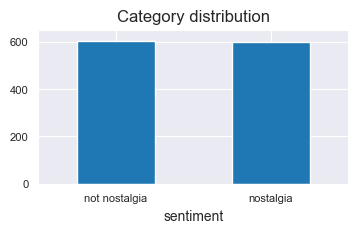

In [176]:
# Plot bar chart for category distribution
print(X.sentiment.value_counts())

# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                title = 'Category distribution',
                                ylim = [0, 650],        
                                rot = 0, fontsize = 8, figsize = (4,2))

\ Feature Creation: Text Tokenization \ 

In [177]:
import nltk

In [178]:
# Create unigrams from comments
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

0                                                                                                                                                                   [Tranent, British, Legion, ,, 1970, 's, ., Loved, the, club, and, people, ., This, song, reminds, me, o, happy, days]
1                                                                                                                                                                   [The, most, underrated, singer, ever, ,, a, beautiful, song, ,, r, I, p, billy, ,, what, a, fabulous, voice, !, !, !]
2    [He, really, has, that, ``, love, you, like, a, brother, '', look, about, him, ., That, safe, ,, let, me, tell, about, all, my, boyfriends, ,, I, 'm, gon, na, use, you, as, a, doormat, sort, of, look, ., Good, song, though, ., It, was, one, of, my, favorites, around, 1980, .]
3                                                                                                                                             [Thank, you,

In [179]:
# X[0:4]

\ Feature subset selection: Convert Text Data to Word Counts \

In [180]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
#learn the vocabulary and return document-term matrix
X_counts = count_vect.fit_transform(X.comment) 

# just for test
# print(X_counts[0])

In [181]:
# test
count_vect.get_feature_names_out()[1000]

'environmental'

In [182]:
# test 
analyze = count_vect.build_analyzer()
# test analyze
analyze(X.comment[1])

['the',
 'most',
 'underrated',
 'singer',
 'ever',
 'beautiful',
 'song',
 'billy',
 'what',
 'fabulous',
 'voice']

In [183]:
X_counts.shape

(1200, 3284)

In [184]:
count_vect.get_feature_names_out()[0:10]

array(['000', '045', '07', '10', '100', '10m', '11', '11th', '12', '13'],
      dtype=object)

In [185]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [186]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

\ Visualization: Heatmap of Term-Document Frequencies \

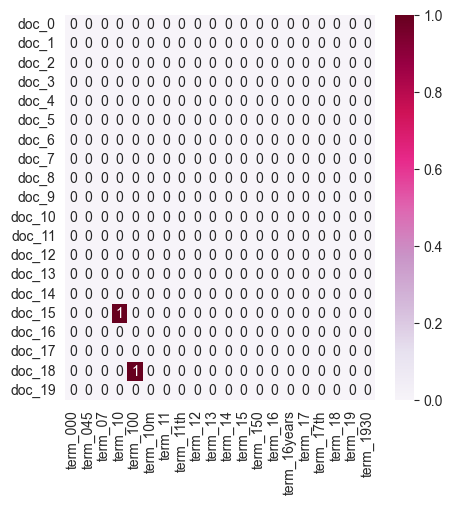

In [187]:
# Create a heatmap to visualize the frequency of selected terms across selected documents
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(5, 5))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

\ Attribute Transformation: Aggregation of Term Frequencies \

In [188]:
# Aggregate term frequencies by summing across all documents
term_frequencies = []

for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

2

/var/folders/6s/ml8d1fzs5wv4kr9zt85ggq0m0000gn/T/ipykernel_86684/3397000641.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



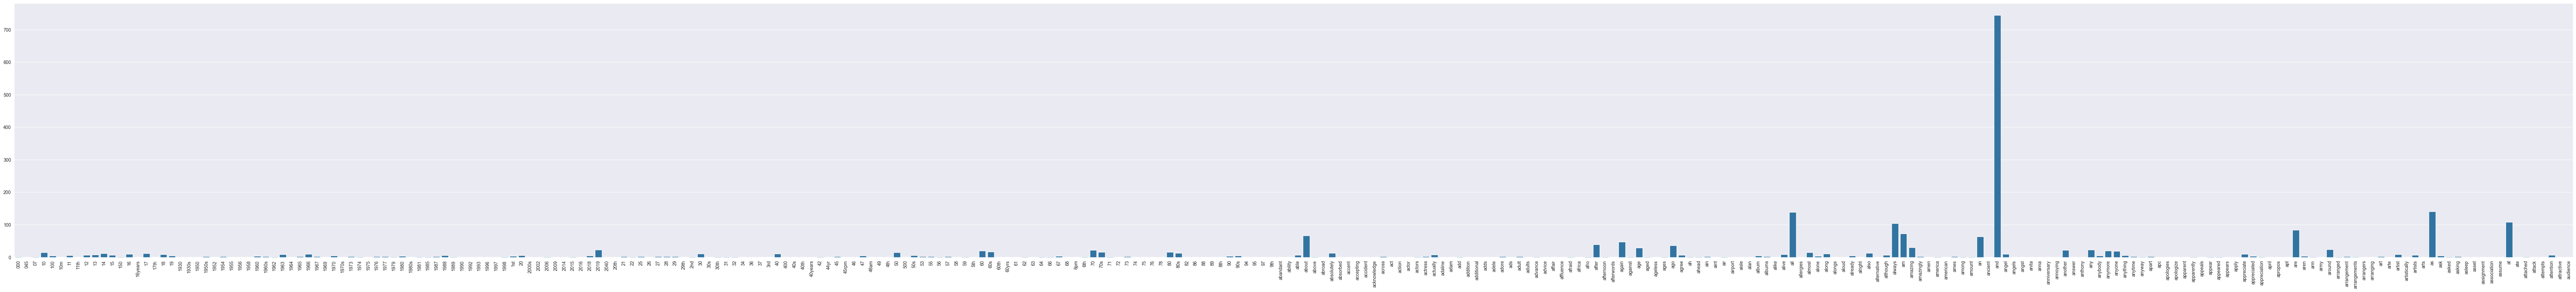

In [189]:
# Plot the frequency distribution of the first 300 terms
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

\ Interactive Bar Graph \

In [190]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"
fig = go.Figure(
    data=[
        go.Bar(
            x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300]
        )
    ]
)

fig.update_layout(
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=90,
    height=800,
    width=1500)

fig.show()

\ top Term Frequencies \

In [191]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"
N = 50  # Set N to a smaller number for efficiency
indices = np.argsort(term_frequencies)[-N:][::-1]

# Create a bar chart with Plotly
fig = go.Figure(
    data=[
        go.Bar(
            x=[count_vect.get_feature_names_out()[i] for i in indices],
            y=[term_frequencies[i] for i in indices],
            marker=dict(
                color='rgba(255, 255, 102, 0.6)',  # Fill color
                line=dict(color='rgba(0, 0, 0, 1.0)', width=2)  # Outline color and width
            )
        )
    ]
)


fig.update_layout(
    title="top Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=90,
    height=800,
    width=1500)

fig.show()

transform the values in that vector into the log distribution

/var/folders/6s/ml8d1fzs5wv4kr9zt85ggq0m0000gn/T/ipykernel_86684/1190816637.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



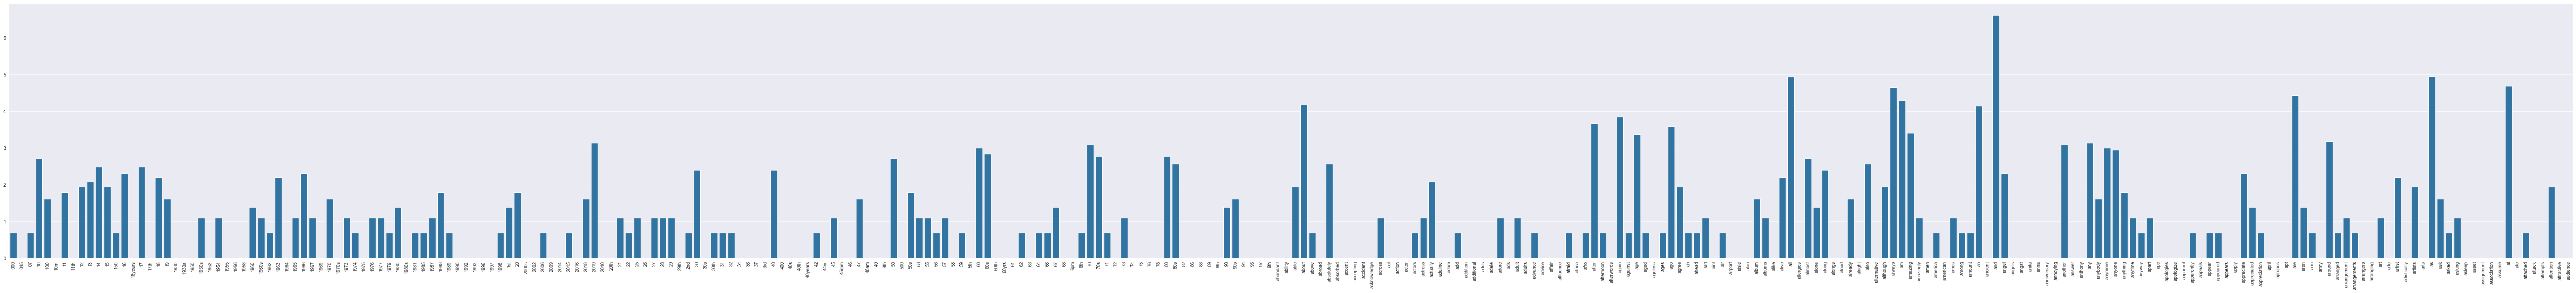

In [192]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

\ Feature Subset Selection: Create Separate DataFrames for Each Sentiment Category \

In [193]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
sentiment = X['sentiment'].unique()  # Get unique category labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each category

for s_kind in sentiment:
    # Filter the original DataFrame by category
    sentiment_dfs[s_kind] = X[X['sentiment'] == s_kind].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for s_kind in sentiment:
    filt_term_document_dfs[s_kind] = create_term_document_df(sentiment_dfs[s_kind])

In [194]:
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment[category_number]}:")
filt_term_document_dfs[sentiment[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


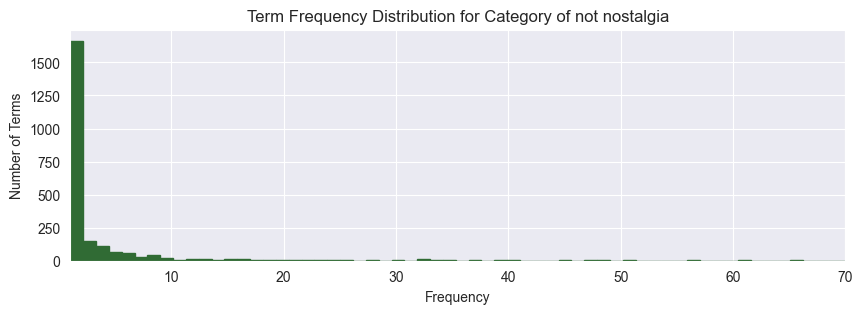

In [195]:
 # Sum over all documents to get total frequency for each word
category_number=1#You can change it 0 or 1
word_counts = filt_term_document_dfs[sentiment[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 3))
plt.hist(word_counts, bins=500, color='#306b34', edgecolor='#306b34')
plt.title(f'Term Frequency Distribution for Category of {sentiment[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 70)
plt.show()

In [196]:
category_number=0 #not nostalgia or nostalgia
word_counts = filt_term_document_dfs[sentiment[category_number]].sum(axis=0).to_numpy()

# top5%
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# least1%
sorted_indices_b = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts_b = word_counts[sorted_indices] 

# top5%
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
# least1%
total_terms = len(sorted_counts_b)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
bottom_1_percent_indices = sorted_indices_b[:bottom_1_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiment[category_number]].iloc[:, i].name for i in top_5_percent_indices]
filtered_words_b = [filt_term_document_dfs[sentiment[category_number]].iloc[:, b].name for b in bottom_1_percent_indices]

print(f"Category: {sentiment[category_number]}")

print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words_b}")

Category: nostalgia
Number of terms in top 5%: 99
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'on', 'that', 'love', 'for', 'you', 'remember', 'time', 'with', 'old', 'is', 'music', 'brings', 'great', 'we', 'as', 'now', 'beautiful', 'but', 'miss', 'from', 'good', 'he', 'her', 'all', 'at', 'still', 'days', 'reminds', 'dad', 'just', 'always', 'songs', 'childhood', 'his', 'first', 'many', 'she', 'have', 'had', 'like', 'listening', 'much', 'up', 'loved', 'voice', 'be', 'one', 'not', 'times', 'am', 'listen', 'him', 'can', 'hear', 'school', 'used', 'every', 'very', 'were', 'young', 'those', 'what', 'out', 'then', 'sing', 'heard', 'thank', 'played', 'again', 'never', 'are', 'these', 'how', 'best', 'thanks', 'they', 'an', 'radio', 'ago', 'day', 'happy', 'really', 'passed']
Number of terms in bottom 1%: 19
Filtered terms: ['yup', 'rolled', 'grand', 'grammartical', 'gramaphone', 'rolling', 'graffiti', 'grandch

In [197]:
# sorted_counts

In [198]:
category_number=0 

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for s_kind in sentiment:
    print(f'\nFor sentiment {s_kind} we filter the following words:')
    term_document_dfs[s_kind] = filter_top_bottom_words_by_sum (filt_term_document_dfs[s_kind])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiment[category_number]}:")
term_document_dfs[sentiment[category_number]]


For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup              1
rolled           1
grand            1
grammartical     1
gramaphone       1
rolling          1
graffiti         1
grandchildren    1
graduation       1
gradually        1
romanticism      1
grace            1
grabbed          1
ronnie           1
gospel           1
romance          1
rose             1
roll             1
robbie           1
dtype: int64
Top 5.0% words: 
passed     28
really     28
happy      28
day        28
ago        30
         ... 
and       383
to        429
this      445
my        448
the       519
Length: 99, dtype: int64

For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
leader           1
muchm            1
ms               1
mph              1
moving           1
motor            1
mornings         1
morning          1
moral            1
moodier          1
mood             1
monumental       1
montgomery       1
money            1
monday  

,07,10,11,11th,12,13,14,15,16,17,...,yo,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
# 分析 nostalgia＆not 以及相對照詞語出現的頻率
import os
from PAMI.extras.convert import denseDF2DB as db
from PAMI.extras.dbStats import TransactionalDatabase as tds

nostalgia_df = X[X['sentiment'] == 'nostalgia'].copy()  # nostalgia 類別
not_nostalgia_df = X[X['sentiment'] == 'not nostalgia'].copy() # not nostalgia

# 創建兩個類別的文件-詞頻 DataFrame
nostalgia_term_document_df = create_term_document_df(nostalgia_df)
not_nostalgia_term_document_df = create_term_document_df(not_nostalgia_df)

# Loop through the dictionary of term-document DataFrames
for category, term_document_df in [('nostalgia', nostalgia_term_document_df), ('not_nostalgia', not_nostalgia_term_document_df)]:
    obj = db.denseDF2DB(term_document_df)
    save_0 = '/Users/aping/PycharmProjects/DM2024-Lab1/Lab1 Handout/DM2024-Lab1-Homework/nostalgia_csv'
    output = os.path.join(save_0, f'td_freq_db_{category}.csv')
    obj.convert2TransactionalDatabase(output, '>=', 1)

Database size (total no of transactions) : 602
Number of items : 2328
Minimum Transaction Size : 4
Average Transaction Size : 20.14784053156146
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.566970589043924
Variance in Transaction Sizes : 111.84665922244764
Sparsity : 0.9913454293249306


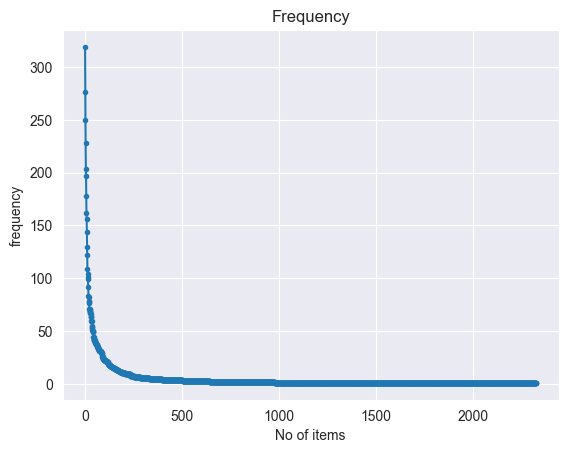

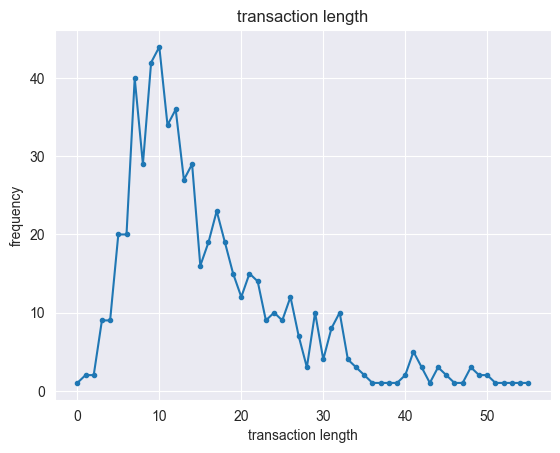

In [200]:
for category in ['nostalgia']:
    tds_obj = tds.TransactionalDatabase(output)
    tds_obj.run()  
    tds_obj.printStats()  
    tds_obj.plotGraphs()  

\ Frequent Pattern Mining: FPGrowth Algorithm \

In [201]:
# FPGrowth_nostalgia
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
nos = alg.FPGrowth(iFile=output, minSup=minSup)
nos.mine()
FPGrowth_nostalgia= nos.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(FPGrowth_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(nos.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 188804
Runtime: 0.8574492931365967


In [202]:
save_1 = '/Users/aping/PycharmProjects/DM2024-Lab1/Lab1 Handout/DM2024-Lab1-Homework/nostalgia_csv'
os.path.join(save_1, 'freq_patterns_nostalgia.txt')
FPGrowth_nostalgia 

,Patterns,Support
0,underrated,3
1,1980,3
2,brother,3
3,brother he,3
4,sort,3
...,...,...
188799,and this the,64
188800,and the,137
188801,this,276
188802,this the,140


In [203]:
# FPGrowth_not nostalgia
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=3
not_nos = alg.FPGrowth(iFile=output, minSup=minSup)
not_nos.mine()
FPGrowth_not_nostalgia= nos.getPatternsAsDataFrame()

# Print the number of patterns found
print('Total No of patterns: ' + str(len(FPGrowth_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(not_nos.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 188804
Runtime: 0.7688770294189453


In [204]:
os.path.join(save_1, 'freq_patterns_not_nostalgia.txt')
FPGrowth_not_nostalgia

,Patterns,Support
0,underrated,3
1,1980,3
2,brother,3
3,brother he,3
4,sort,3
...,...,...
188799,and this the,64
188800,and the,137
188801,this,276
188802,this the,140


In [205]:
# test
# print(FPGrowth_not_nostalgia.columns)
# print(FPGrowth_nostalgia.columns)

\ Frequent Pattern Mining: FAE \

In [206]:
# fae nostalgia
from PAMI.frequentPattern.topk import FAE

k = 4  # Example value, adjust it as needed
fae_nostalgia = FAE.FAE(iFile=output, k=k)
fae_nostalgia.mine()
frequent_fae_comp_graphics = fae_nostalgia.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequent_fae_comp_graphics)))  # Print the total number of patterns
print('Runtime: ' + str(fae_nostalgia.getRuntime()))  # Print runtime

save_2 = os.path.join(save_1, 'freq_patterns_nostalgia_fae.txt')
fae_nostalgia.save(save_2)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 4
Runtime: 0.007112026214599609


In [207]:
# fae not nostalgia
from PAMI.frequentPattern.topk import FAE

k = 4  # Example value, adjust it as needed
fae_not_nostalgia = FAE.FAE(iFile=output, k=k)
fae_nostalgia.mine()
frequent_fae_comp_graphics_not = fae_not_nostalgia.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequent_fae_comp_graphics)))  # Print the total number of patterns
print('Runtime: ' + str(fae_nostalgia.getRuntime()))  # Print runtime

save_2_not = os.path.join(save_1, 'freq_patterns_nostalgia_fae.txt')
fae_nostalgia.save(save_2_not)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 4
Runtime: 0.00675201416015625


\ Frequent Pattern Mining: MaxFPGrowth \

In [208]:
# MaxFPGrowth nostalgia
from PAMI.frequentPattern.maximal import MaxFPGrowth

minSup = 4
max_nostalgia = MaxFPGrowth.MaxFPGrowth(iFile=output, minSup=minSup )
max_nostalgia.mine()
frequent_max_comp_graphics = max_nostalgia.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequent_max_comp_graphics)))  # Print the total number of patterns
print('Runtime: ' + str(max_nostalgia.getRuntime()))  # Print runtime

save_3 = os.path.join(save_1, 'freq_patterns_nostalgia_maxfp.txt')
max_nostalgia.save(save_3)  # Save the patterns

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 13208
Runtime: 1.2861807346343994


In [209]:
# MaxFPGrowth not nostalgia
from PAMI.frequentPattern.maximal import MaxFPGrowth

minSup = 4
max_not_nostalgia = MaxFPGrowth.MaxFPGrowth(iFile=output, minSup=minSup )
max_not_nostalgia.mine()
frequent_max_comp_graphics_not = max_not_nostalgia.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequent_max_comp_graphics_not)))  # Print the total number of patterns
print('Runtime: ' + str(max_not_nostalgia.getRuntime()))  # Print runtime

save_4 = os.path.join(save_1, 'freq_patterns_nostalgia_maxfp_not.txt')
max_nostalgia.save(save_4)  # Save the patterns

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 13208
Runtime: 2.0495402812957764


In [210]:
# test
# print(X.columns#

In [211]:
import pandas as pd

dfs = [FPGrowth_not_nostalgia, FPGrowth_nostalgia]

pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1  # 如果模式還不存在於字典中，則將其計數設為1
        else:
            pattern_counts[pattern] += 1  # 如果模式已經存在於字典中，則將其計數加1
            
# 上面顯示3
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count <= 3}

total_patterns_count = sum(len(df) for df in dfs)

discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)  # 將過濾後的資料框添加到列表中

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)

print(f"Number of patterns discarded: {discarded_patterns_count}")

                          Patterns  Support
377607                         the      319
188803                         the      319
377605                        this      276
188801                        this      276
188797                         and      250
...                            ...      ...
143074   of beautiful in so and to        3
143073      beautiful in so and to        3
143072  beautiful in so and the of        3
143071     beautiful in so and the        3
188804                  underrated        3

[377608 rows x 2 columns]
Number of patterns discarded: 188804


In [212]:
# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # 'comment' column contains the text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=train_data['sentiment'].unique())

In [213]:
# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in train_data['sentiment'].unique():
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

# Display the augmented data
print(augmented_df.head())

   000  045  07  10  100  10m  11  11th  12  13  ...  youth  youthful  \
0    0    0   0   0    0    0   0     0   0   0  ...      0         0   
1    0    0   0   0    0    0   0     0   0   0  ...      0         0   
2    0    0   0   0    0    0   0     0   0   0  ...      0         0   
3    0    0   0   0    0    0   0     0   0   0  ...      0         0   
4    0    0   0   0    0    0   0     0   0   0  ...      0         0   

   youtube  yrs  yuo  yup  zealand  zulus  nostalgia  not nostalgia  
0        0    0    0    0        0      0          0              0  
1        0    0    0    0        0      0          0              0  
2        0    0    0    0        0      0          0              0  
3        0    0    0    0        0      0          0              0  
4        0    0    0    0        0      0          0              0  

[5 rows x 3286 columns]


\ Dimensionality Reduction: PCA, t-SNE, and UMAP \

In [214]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to term-document matrix
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [215]:
# test 
'''print(X_pca_tdm.shape)
print(X_tsne_tdm.shape)
print(X_umap_tdm.shape)'''

'print(X_pca_tdm.shape)\nprint(X_tsne_tdm.shape)\nprint(X_umap_tdm.shape)'

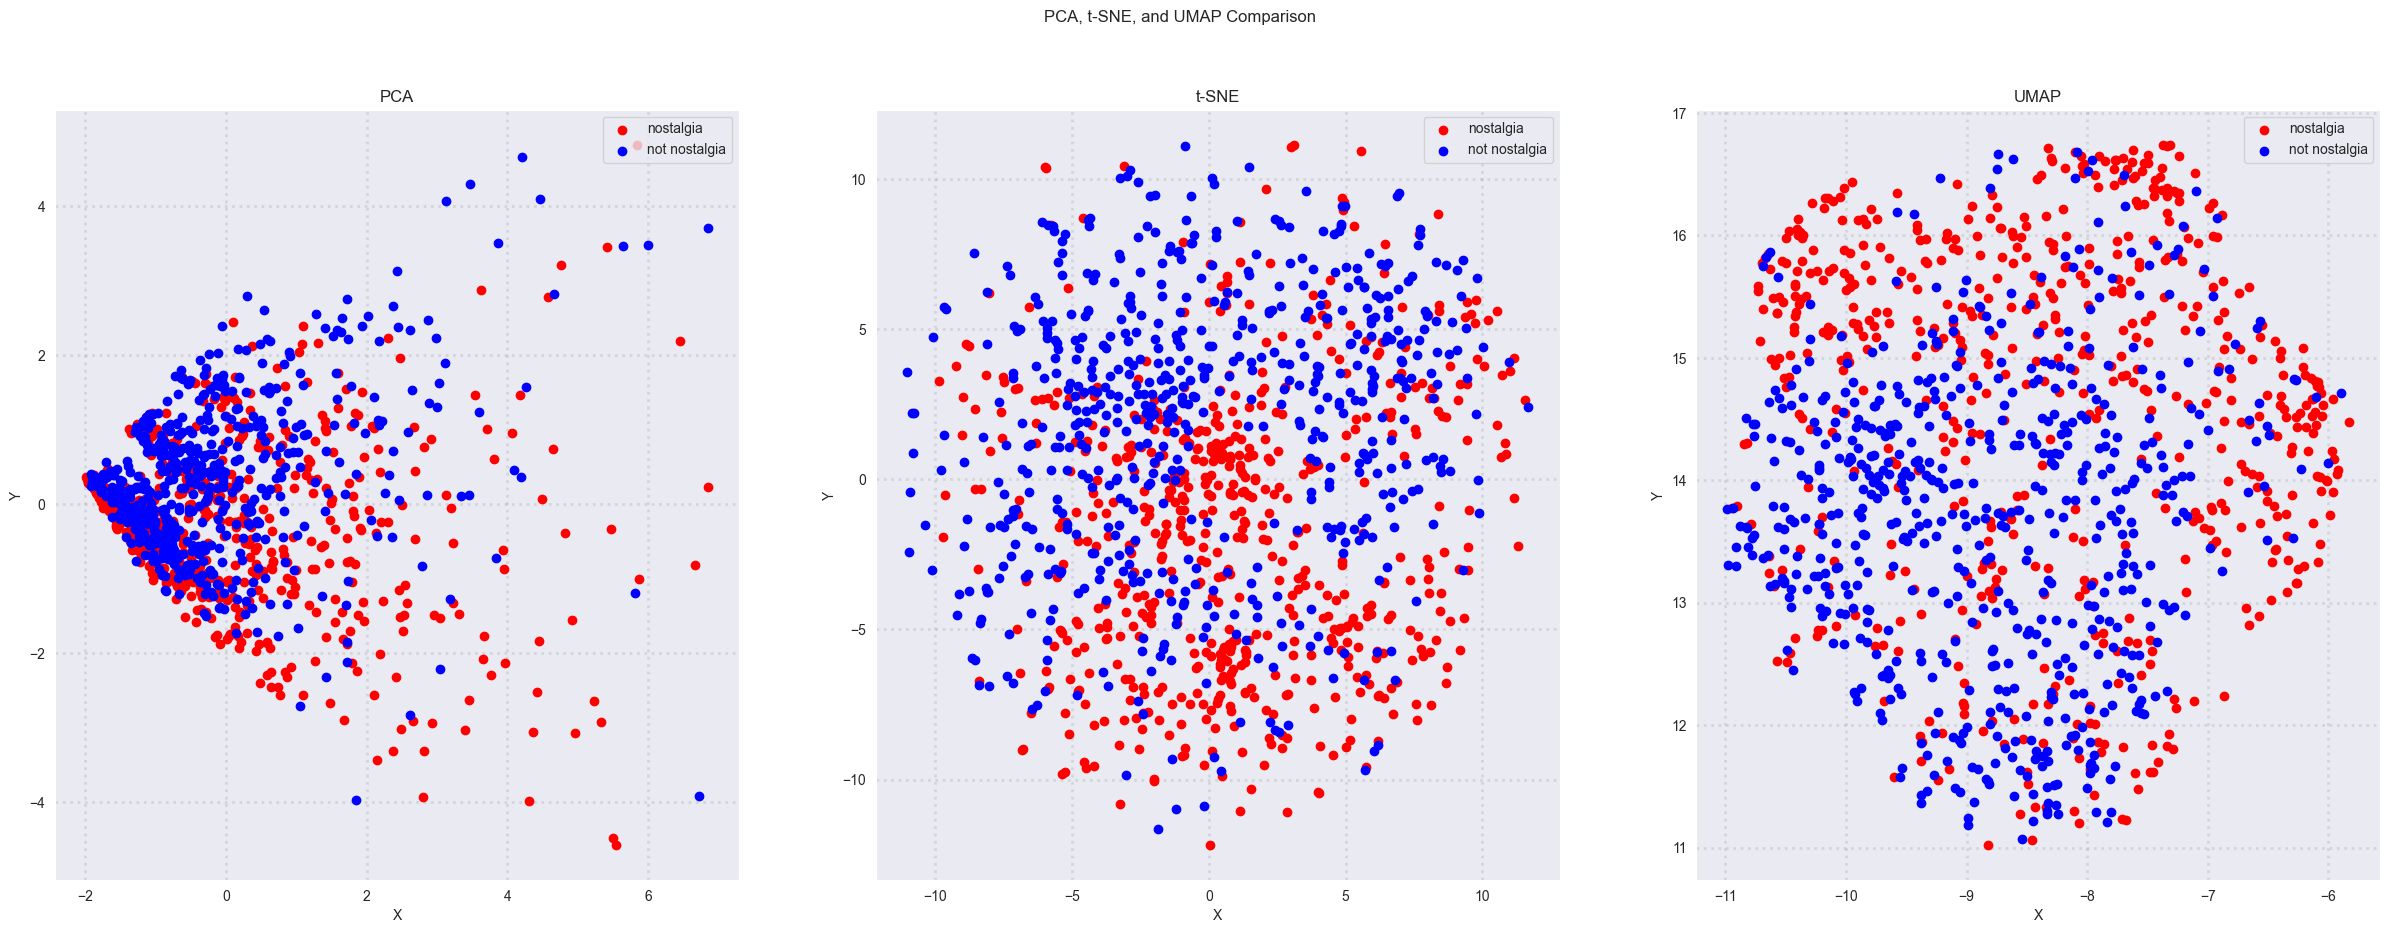

In [228]:
# Plotting Dimensionality Reduction Results
col = ['red', 'blue']
sentiment = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10)) 
# Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

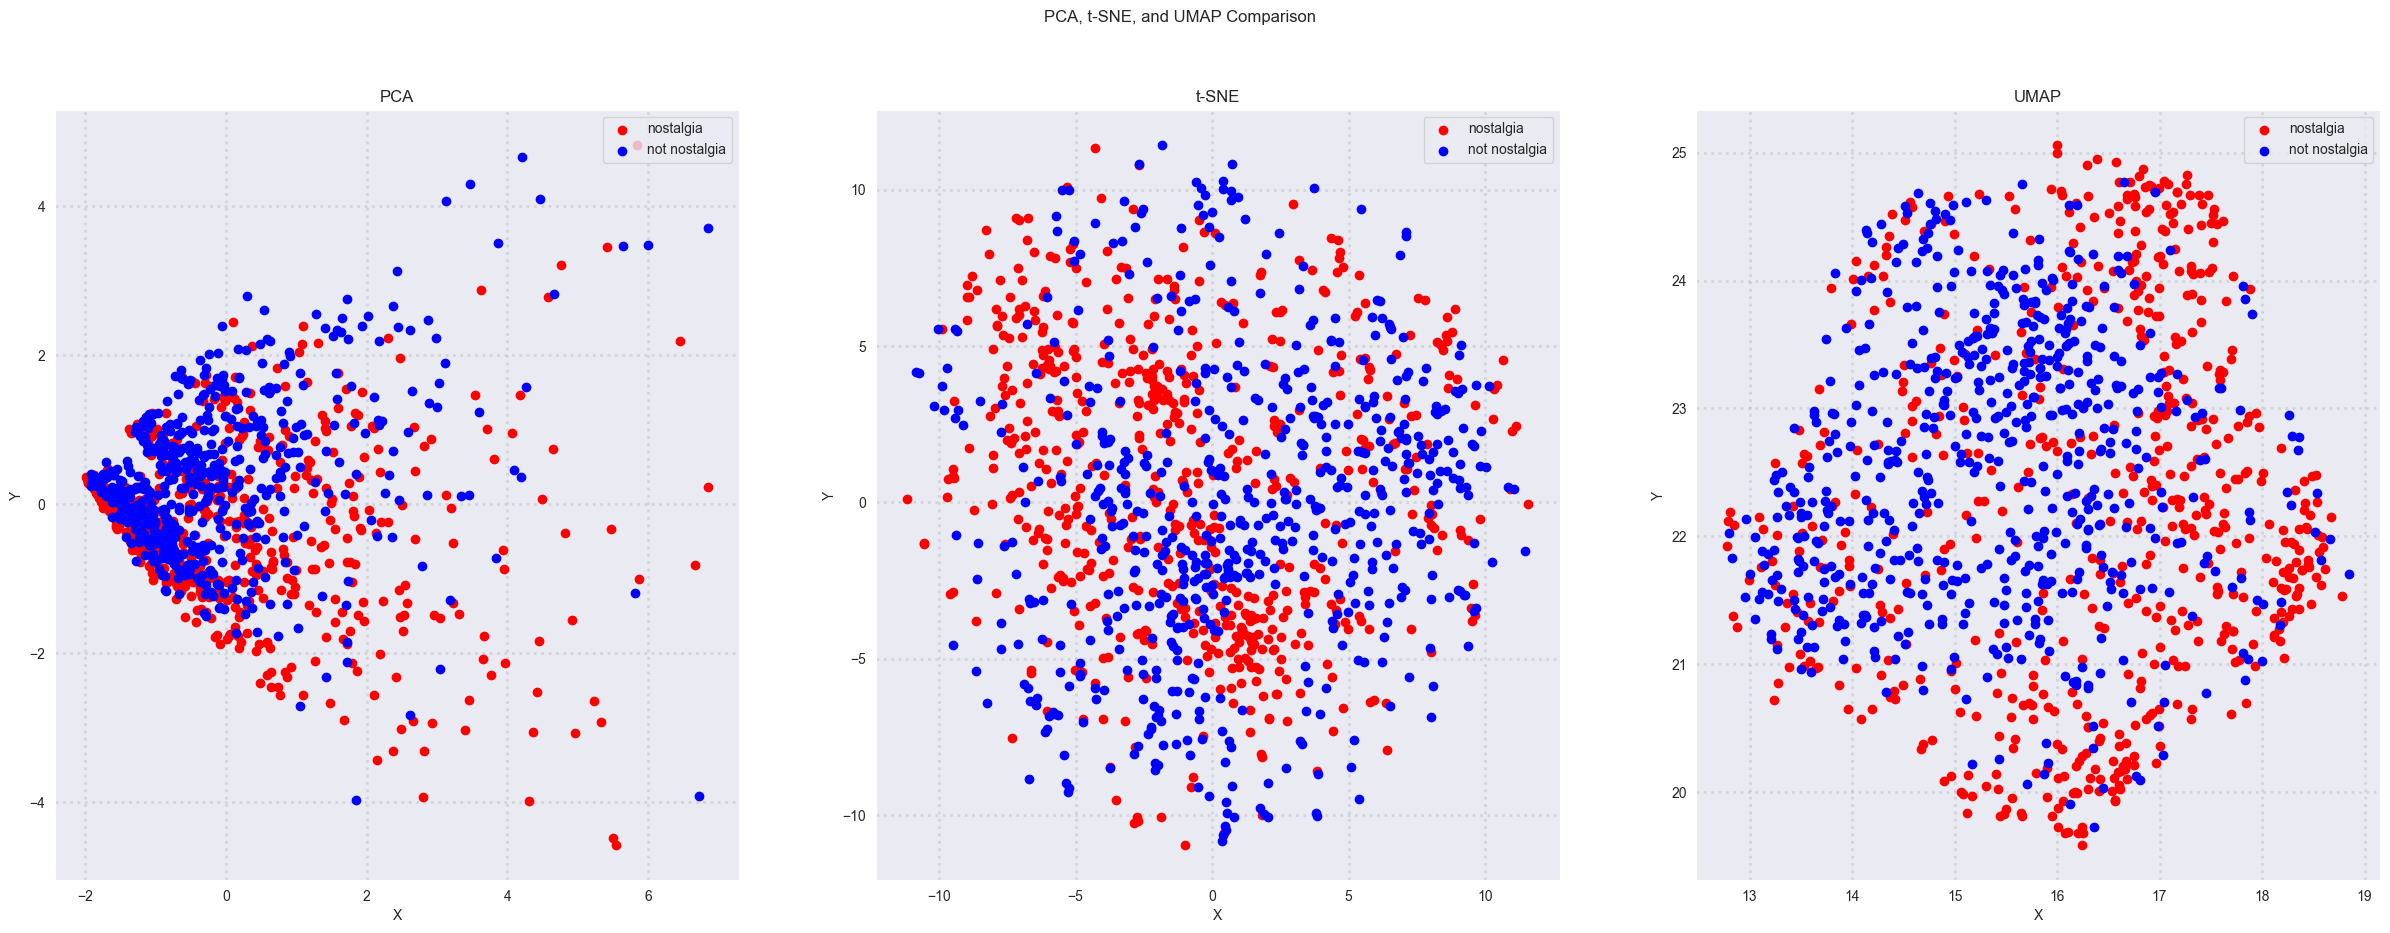

In [217]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['red', 'blue']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

\ Discretization and Binarization \

In [218]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

LabelBinarizer()

In [219]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:3]

,sentiment,comment,unigrams,tokenized_text,bin_sentiment
0,nostalgia,"Tranent British Legion, 1970's. Loved the club and people. This song reminds me o happy days","[Tranent, British, Legion, ,, 1970, 's, ., Loved, the, club, and, people, ., This, song, reminds, me, o, happy, days]","{1970's., people., British, This, o, happy, me, Legion,, Loved, the, days, Tranent, and, song, reminds, club}",[0]
1,not nostalgia,"The most underrated singer ever,a beautiful song ,r I p billy, what a fabulous voice !!!","[The, most, underrated, singer, ever, ,, a, beautiful, song, ,, r, I, p, billy, ,, what, a, fabulous, voice, !, !, !]","{billy,, what, !!!, most, ,r, beautiful, I, p, ever,a, voice, underrated, a, singer, The, song, fabulous}",[1]
2,not nostalgia,"He really has that ""love you like a brother"" look about him. That safe, let me tell about all my boyfriends, I'm gonna use you as a doormat sort of look. Good song though. It was one of my favorites around 1980.","[He, really, has, that, ``, love, you, like, a, brother, '', look, about, him, ., That, safe, ,, let, me, tell, about, all, my, boyfriends, ,, I, 'm, gon, na, use, you, as, a, doormat, sort, of, look, ., Good, song, though, ., It, was, one, of, my, favorites, around, 1980, .]","{He, boyfriends,, gonna, around, brother"", Good, I'm, look., safe,, sort, has, ""love, It, really, one, 1980., that, my, me, doormat, of, tell, him., use, That, favorites, all, was, you, as, though., a, let, song, look, about, like}",[1]


*** step6. Data Exploration ***

In [220]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [221]:
print(document_to_transform_1, document_to_transform_2, document_to_transform_3)

['My parents loved this too. Listening to the music they loved/played when we were children brings me a lot of comfort.'] ['Hey youtube, could you please move that SORT COMMENTS BOX out of the way as it blocks my texting. Thank You.'] ['Those guys could compose the most beautiful music. I love this song!']


In [222]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [223]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" % {"x": cos_sim_count_1_2.item()})
print("Cosine Similarity using count bw 1 and 3: %(x)f" % {"x": cos_sim_count_1_3.item()})
print("Cosine Similarity using count bw 2 and 3: %(x)f" % {"x": cos_sim_count_2_3.item()})

print("Cosine Similarity using count bw 1 and 1: %(x)f" % {"x": cos_sim_count_1_1.item()})
print("Cosine Similarity using count bw 2 and 2: %(x)f" % {"x": cos_sim_count_2_2.item()})
print("Cosine Similarity using count bw 3 and 3: %(x)f" % {"x": cos_sim_count_3_3.item()})


Cosine Similarity using count bw 1 and 2: 0.130435
Cosine Similarity using count bw 1 and 3: 0.188608
Cosine Similarity using count bw 2 and 3: 0.125739
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


*** step7. Data Classification ***

\ Data Classification: Naive Bayes Classification \

In [224]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment', 'comment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [225]:
X_train

,000,045,07,10,100,10m,11,11th,12,13,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [226]:
import pandas as pd
from sklearn.metrics import classification_report

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, target_names=target_names, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Print evaluation results
print("\n================ Evaluation Results ================")
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n")
print(report_df)
print("\n====================================================\n")


================ Evaluation Results ================
Accuracy: 0.8972

Classification Report:

                                                                     precision  \
Come back, please come back my old memories or take them away.        0.851485   
She sounds like an old friend. I mean, a really really good friend.   0.955696   
accuracy                                                              0.897222   
macro avg                                                             0.903591   
weighted avg                                                          0.903880   

                                                                       recall  \
Come back, please come back my old memories or take them away.       0.960894   
She sounds like an old friend. I mean, a really really good friend.  0.834254   
accuracy                                                             0.897222   
macro avg                                                            0.897574   
weight